In [1]:
import pandas as pd
import numpy as np

import fastai
import torch
from fastai.vision.all import *


from pathlib import Path

In [2]:
path = Path('/kaggle/input/pnevmoniya/train')
path.iterdir()

<generator object Path.iterdir at 0x78bceb78bf40>

In [3]:
def data_loader(data):
    pneumonia = DataBlock(
        blocks = (ImageBlock, CategoryBlock),
        get_items = get_image_files,
        get_y = parent_label,
        item_tfms = Resize(224)
    )

    dls = pneumonia.dataloaders(data)
    return dls

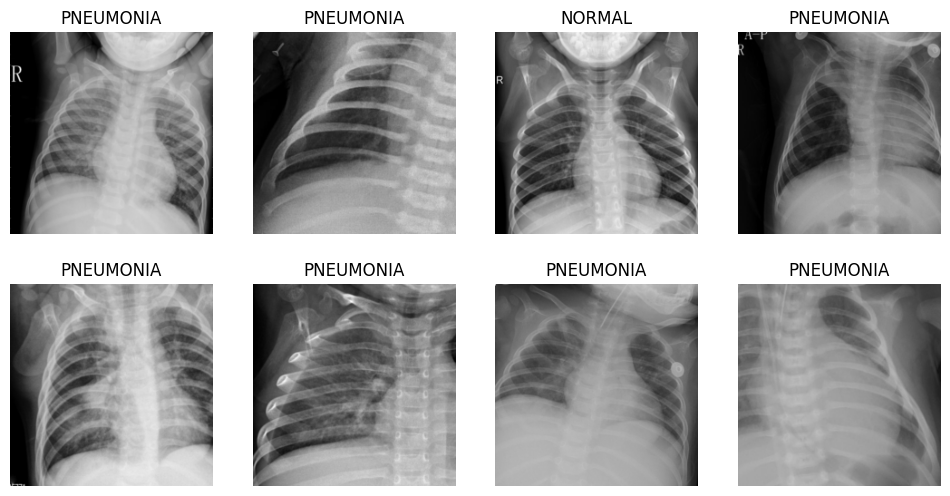

In [4]:
dls = data_loader(path)
dls.train.show_batch(max_n=8, nrows=2)

In [5]:
model = cnn_learner(dls, resnet34, metrics=accuracy)
model.fine_tune(4)

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 204MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.460548,0.163126,0.956855,00:55


epoch,train_loss,valid_loss,accuracy,time
0,0.174891,0.070478,0.976031,00:56
1,0.091211,0.064251,0.979866,00:57
2,0.059772,0.052953,0.984660,00:56
3,0.029941,0.034686,0.988495,00:57


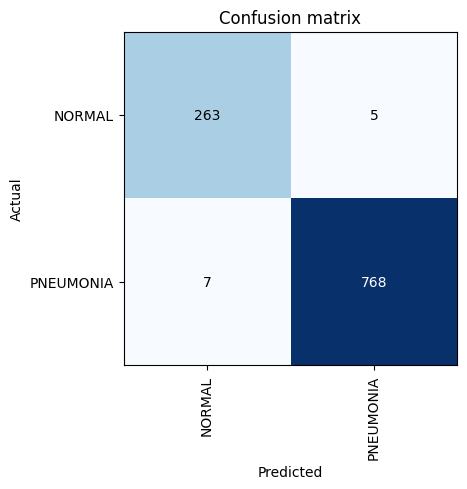

In [6]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix()

In [7]:
interp.print_classification_report()

              precision    recall  f1-score   support

      NORMAL       0.97      0.98      0.98       268
   PNEUMONIA       0.99      0.99      0.99       775

    accuracy                           0.99      1043
   macro avg       0.98      0.99      0.98      1043
weighted avg       0.99      0.99      0.99      1043



In [8]:
df_sub = pd.read_csv('/kaggle/input/pnevmoniya/sample_solution.csv')
df_sub.head()

,id,labels
0,test_img_10001.jpeg,0
1,test_img_10002.jpeg,0
2,test_img_10003.jpeg,0
3,test_img_10004.jpeg,0
4,test_img_10005.jpeg,0


In [9]:
for i in range(0,624):
    label = df_sub.iloc[i,0]
    img = PILImage.create(Path(f'/kaggle/input/pnevmoniya/test/{label}'))
    pred, _, prob = model.predict(img)
    df_sub.iloc[i,1] = pred

/tmp/ipykernel_23/949415626.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'PNEUMONIA' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_sub.iloc[i,1] = pred


In [10]:
df_sub['labels'] = df_sub['labels'].replace({'PNEUMONIA': 1, 'NORMAL': 0})
df_sub.to_csv('submissionn.csv', index=False)

/tmp/ipykernel_23/1240672138.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sub['labels'] = df_sub['labels'].replace({'PNEUMONIA': 1, 'NORMAL': 0})


In [11]:
df = pd.read_csv("submissionn.csv")

In [12]:
df['labels'].value_counts()

labels
1    518
0    106
Name: count, dtype: int64